<div style="font-size: 30px">
<font color='blue'> <b>Personalized Anime Recommendations for 2024</b></font>

<a href="javascript:code_toggle()"><img src="https://blog.playstation.com/tachyon/2016/10/unnamed-file-6.jpg" width="1000"></a>


## Table of Contents
*  [ Project Overview](#chapter1)
    *  [1.1 Introduction](#section1_1)
    *  [1.2 Aim](#section1_2)
    *  [1.3 Objectives](#section1_3)
*  [ Importing Packages](#chapter2)
*  [ Loading Data](#chapter3)
*  [ Data Cleaning](#chapter4)
*  [ Data Preprocessing](#chapter5)
*  [ Exploratory data analysis (EDA)](#chapter6)
*  [ Model Training and Evaluation](#chapter7)
*  [ Model parameters & hyperparameters tunning](#chapter8)
*  [ Conclusion](#chapter9)



## Project Overview <a id="chapter1"><a>

#### 1.1 Introduction <a id="section1_1"></a>

#### 1.2 Aim<a id="section1_2"></a>

#### 1.3 Objectives<a id="section1_3"></a>

## Importing Packages <a id="chapter2"><a>

<div class="alert alert-block alert-info">
<b>Importing Packages</b> is an essential step in any data analysis or machine learning project, as it allows you to access and utilize various libraries and tools to perform specific tasks. Python provides a rich ecosystem of packages for data manipulation, visualization, statistical analysis, and machine learning. Commonly used packages include pandas for data manipulation, matplotlib and seaborn for data visualization, scikit-learn for machine learning, and numpy for numerical computations. Importing the right packages at the beginning of your analysis ensures that you have the necessary tools to effectively explore and analyze your data.
</di>


In [7]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading data <a id="chapter3"><a>

<div class="alert alert-block alert-info">
<b>Loading Data</b> is the initial step in the data analysis process, involving the retrieval and loading of data into a suitable format for analysis. This step is crucial as it sets the foundation for the entire analysis process. The data can be loaded from various sources such as CSV files, databases, or APIs. It is essential to ensure that the data is loaded correctly and that any initial preprocessing steps, such as handling missing values or encoding categorical variables, are performed accurately to prepare the data for further analysis.
</di>


In [8]:
# Load the data
anime_data = pd.read_csv('anime.csv')
submission_data = pd.read_csv('submission.csv')
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Display the first 5 rows of each dataset
print("First 5 rows of anime_data:")
print(anime_data.head())

print("First 5 rows of submission_data:")
print(submission_data.head())

print("First 5 rows of train_data:")
print(train_data.head())

print("\nFirst 5 rows of test_data:")
print(test_data.head())

First 5 rows of anime_data:
   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266  
First 5 rows of submission_data:
           ID  rating
0  14862_1232     5.3
1  14862_7974     4.0
2  24873_2349     6

## Data Cleaning <a id="chapter4"><a>

<div class="alert alert-block alert-info">
  <b>Data cleaning</b> is a crucial step in the data analysis process, involving the correction or removal of incorrect, corrupted, duplicate, or incomplete data within a dataset. Through various techniques such as filling missing values, removing outliers, and standardizing data formats, it ensures the accuracy and reliability of subsequent analyses and decision-making.
</div

In [9]:
# Get the shape of the anime_data DataFrame
print('The shape of the anime_data:', anime_data.shape)

# Get the shape of the submission_data DataFrame
print('The shape of the submission_data:', submission_data.shape)

# Get the shape of the train_data DataFrame
print('The shape of the train_data:', train_data.shape)

# Get the shape of the test_data DataFrame
print('The shape of the test_data:', test_data.shape)

The shape of the anime_data: (12294, 7)
The shape of the submission_data: (3, 2)
The shape of the train_data: (5703555, 3)
The shape of the test_data: (633686, 2)


- Exploring the shape of the anime_data, submission_data, train_data and the test_data

In [10]:
# Display summary information of the anime_data DataFrame
print('The summary information of the anime_data:', anime_data.info())

# Display summary information of the submission_data DataFrame
print('The summary information of the submission_data:', submission_data.info())

# Display summary information of the train_data DataFrame
print('The summary information of the train_data:', train_data.info())

# Display summary information of the test_data DataFrame
print('The summary information of the test_data:', test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
The summary information of the anime_data: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      3 non-null      object 
 1   rating  3 non-null      float64
dtypes: float64(1), object(1)
memory usage: 180.0+ bytes
The summary information of the submission_data: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5703555 entries, 0 to

- Displaying summary information about the anime_data, submission_data, train_data and the test_data

In [11]:
# counting Null value
def check_null_values(df):
    """
    Print the count of null values for each column in a DataFrame.

    This function iterates through each column in the DataFrame to check for the presence of null values.
    If a column contains null values, it prints the column name along with the number of null values.

    Parameters:
    df (DataFrame): The pandas DataFrame to check for null values.

    Returns:
    None: This function does not return a value; it only prints information.
    """
    has_nulls = False
    for column in df:
        null_count = df[column].isnull().sum()
        if null_count > 0:
            print(f'{column} has {null_count} null values')
            has_nulls = True

    if not has_nulls:
        print('There are no null values in the DataFrame')

# Checking null values for each DataFrame
print("Anime Data Null Values:")
check_null_values(anime_data)
print("\nSubmission Data Null Values:")
check_null_values(submission_data)
print("\nTrain Data Null Values:")
check_null_values(train_data)
print("\nTest Data Null Values:")
check_null_values(test_data)

Anime Data Null Values:
genre has 62 null values
type has 25 null values
rating has 230 null values

Submission Data Null Values:
There are no null values in the DataFrame

Train Data Null Values:
There are no null values in the DataFrame

Test Data Null Values:
There are no null values in the DataFrame


In [12]:
# Fill null values in 'rating' with a specific value like the mean rating
mean_rating = anime_data['rating'].mean()
anime_data['rating'] = anime_data['rating'].fillna(mean_rating)

# Fill 'genre' and 'type' with the most common values (mode)
most_common_genre = anime_data['genre'].mode()[0]
most_common_type = anime_data['type'].mode()[0]

anime_data['genre'] = anime_data['genre'].fillna(most_common_genre)
anime_data['type'] = anime_data['type'].fillna(most_common_type)

In [13]:
# Checking null values for Anime DataFrame after filling the null values
print("Anime Data Null Values:")
check_null_values(anime_data)

Anime Data Null Values:
There are no null values in the DataFrame


In [14]:
# counting duplicate value
def count_duplicate_rows(df):
    """
    Count the number of duplicate rows in a DataFrame.

    This function calculates the total number of duplicate rows in the DataFrame by calling the `duplicated` method,
    which marks duplicates as `True`, and then sums these cases.

    Parameters:
    df (pandas.DataFrame): The DataFrame to check for duplicates.

    Returns:
    int: The count of duplicate rows.
    """
    duplicate_count = df.duplicated().sum()
    return duplicate_count

# Counting duplicate rows for each DataFrame
anime_duplicates = count_duplicate_rows(anime_data)
submission_duplicates = count_duplicate_rows(submission_data)
train_duplicates = count_duplicate_rows(train_data)
test_duplicates = count_duplicate_rows(test_data)

# Printing the count of duplicate rows
print(f"The number of duplicate rows in the anime_data: {anime_duplicates}")
print(f"The number of duplicate rows in the submission_data: {submission_duplicates}")
print(f"The number of duplicate rows in the train_data: {train_duplicates}")
print(f"The number of duplicate rows in the test_data: {test_duplicates}")

The number of duplicate rows in the anime_data: 0
The number of duplicate rows in the submission_data: 0
The number of duplicate rows in the train_data: 1
The number of duplicate rows in the test_data: 0


In [15]:
# View all rows that are duplicated, including the first occurrence
all_duplicated_rows = train_data[train_data.duplicated(keep=False)]

# Display all duplicated rows, including the first occurrence
print("\nAll duplicated rows in train_data, including the first occurrence:")
print(all_duplicated_rows)



All duplicated rows in train_data, including the first occurrence:
         user_id  anime_id  rating
3273846    42653     16498       8
3273897    42653     16498       8


In [16]:
# Remove duplicate rows and keep the first occurrence
train_data = train_data.drop_duplicates(keep='first')

# Display the cleaned DataFrame
print("train_data after removing duplicate rows:")
print(train_data.shape)

train_data after removing duplicate rows:
(5703554, 3)


#### Observations ####

1. Data Shape:
- `anime_data` : 12294 rows and 7 columns.
- `submission_data` : 3 rows and 2 columns.
- `train_data` : 5703555 rows and 3 columns.
- `test_data` : 633686 rows and 2 columns.
2. Data Types:

- `anime_data` :

  - anime_id: int64
  - name: object
  - genre: object
  - type: object
  - episodes: object
  - rating: float64
  - members: int64
- `submission_data` :

  - ID: object
  - rating: float64
- `train_data` :

  - user_id: int64
  - anime_id: int64
  - rating: int64
- `test_data` :

  - user_id: int64
  - anime_id: int64
3. Null Values:
- `anime_data` :

   - genre has 62 null values
   - type has 25 null values
   - rating has 230 null values
   - submission_data: There are no null values.

- `train_data` : There are no null values.

- `test_data` : There are no null values.
4. Duplicates:
- `anime_data` : There are no duplicate rows.
- `submission_data` : There are no duplicate rows.
- `train_data` : There was 1 duplicate row, which has been removed. The shape of the cleaned train_data is now (5703554, 3).
- `test_data` : There are no duplicate rows.

## Data Preprocessing <a id="chapter5"><a>

<div class="alert alert-block alert-info">
  <b>Data preprocessing</b> is a fundamental step in the data analysis and machine learning pipeline, encompassing the transformation and organization of raw data into a format suitable for analysis. This process includes activities such as normalization, encoding categorical variables, feature scaling, and splitting data into training and testing sets, thereby enhancing the performance and accuracy of machine learning models.
</div>


# Exploratory Data Analysis (EDA) <a id="chapter6"><a>

<div class="alert alert-block alert-info">
<b>Exploratory Data Analysis (EDA)</b> is a vital step in the data analysis process, aimed at understanding the underlying patterns, relationships, and structure of the data. It involves various techniques such as visualizations, summary statistics, and correlation analysis to uncover insights and identify potential issues. EDA helps in forming hypotheses, guiding further analysis, and making informed decisions about data preprocessing and modeling.
</di>


In [17]:
data = pd.read_csv('anime.csv')
data.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


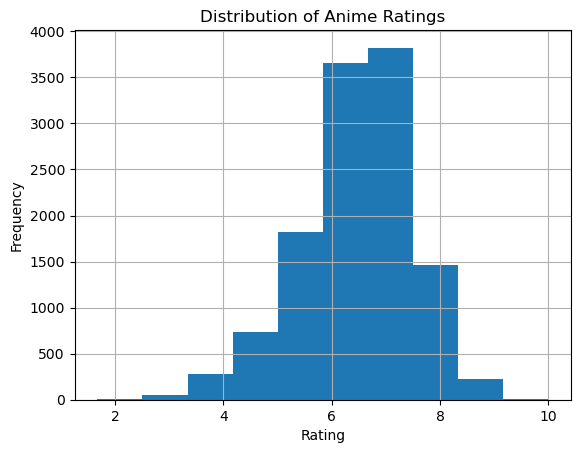

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Use the 'data' DataFrame which likely contains the 'rating' column
data['rating'].hist(bins=10)
plt.title('Distribution of Anime Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

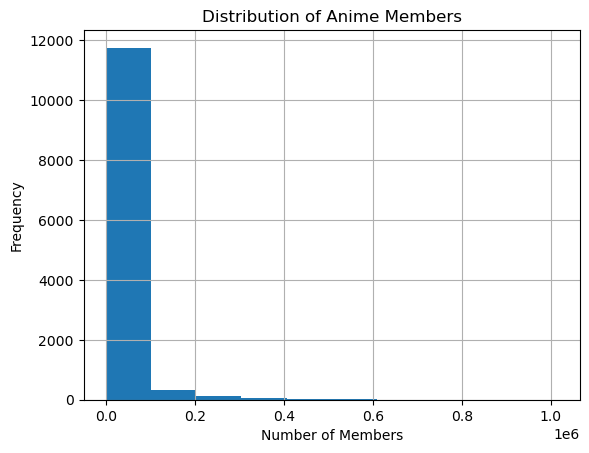

In [19]:
data['members'].hist(bins=10)
plt.title('Distribution of Anime Members')
plt.xlabel('Number of Members')
plt.ylabel('Frequency')
plt.show()

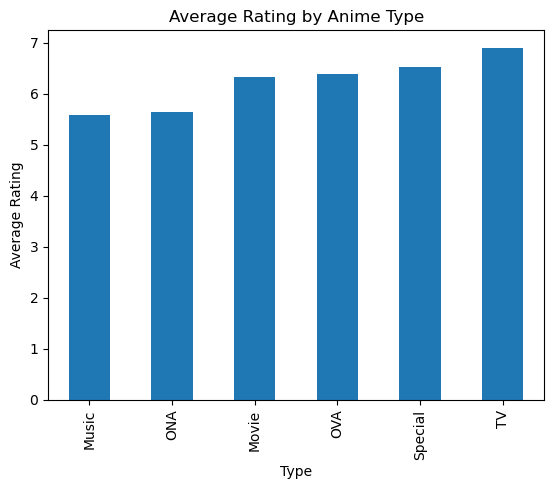

In [20]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is the DataFrame you loaded earlier and it contains 'type' and 'rating' columns
avg_rating_by_type = data.groupby('type')['rating'].mean().sort_values()
avg_rating_by_type.plot(kind='bar')
plt.title('Average Rating by Anime Type')
plt.xlabel('Type')
plt.ylabel('Average Rating')
plt.show()

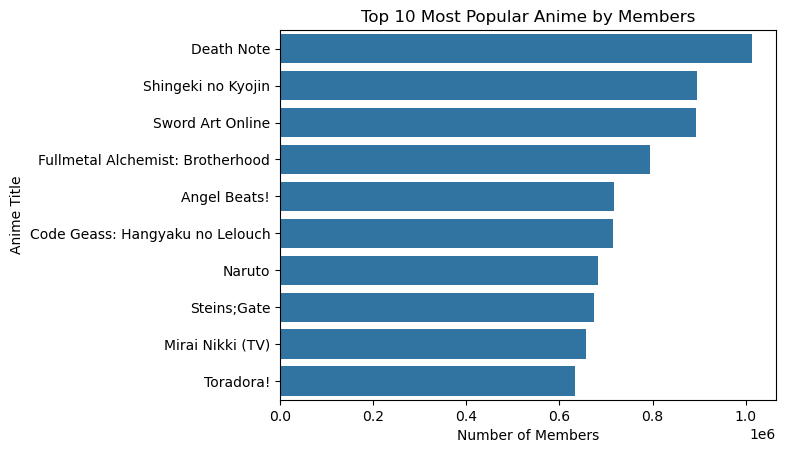

In [21]:
# Assuming you still have the DataFrame stored in the variable 'data'
top_10_popular = data.nlargest(10, 'members')  # Use the DataFrame 'data'
sns.barplot(x='members', y='name', data=top_10_popular)
plt.title('Top 10 Most Popular Anime by Members')
plt.xlabel('Number of Members')
plt.ylabel('Anime Title')
plt.show()

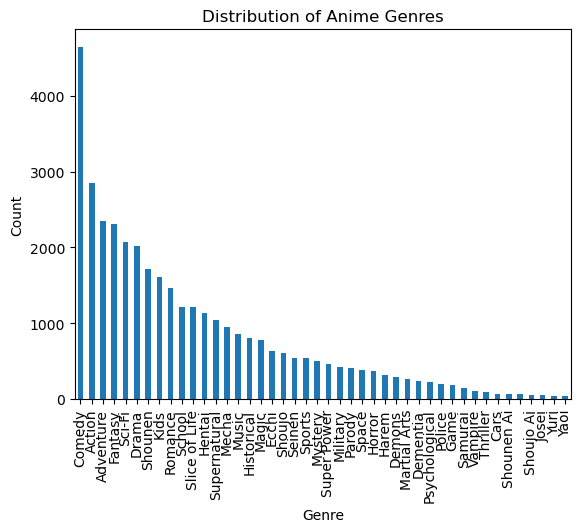

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from itertools import chain

# Assuming 'data' is the correct DataFrame with the 'genre' column
# Handle potential float values in the 'genre' column
data['genre'] = data['genre'].fillna('').astype(str)  # Fill missing values and convert to string

genres = data['genre'].str.split(', ').tolist() 
genre_counts = Counter(chain.from_iterable(genres))
genre_counts_df = pd.DataFrame.from_dict(genre_counts, orient='index').reset_index()
genre_counts_df.columns = ['genre', 'count']

genre_counts_df.sort_values('count', ascending=False).plot(kind='bar', x='genre', y='count', legend=False)
plt.title('Distribution of Anime Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

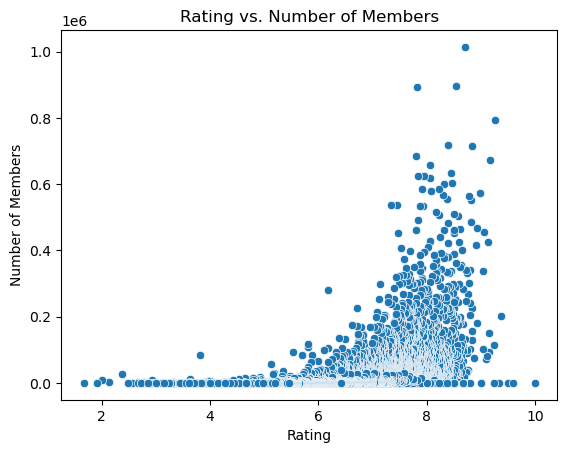

In [24]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


sns.scatterplot(x='rating', y='members', data=data)
plt.title('Rating vs. Number of Members')
plt.xlabel('Rating')
plt.ylabel('Number of Members')
plt.show()

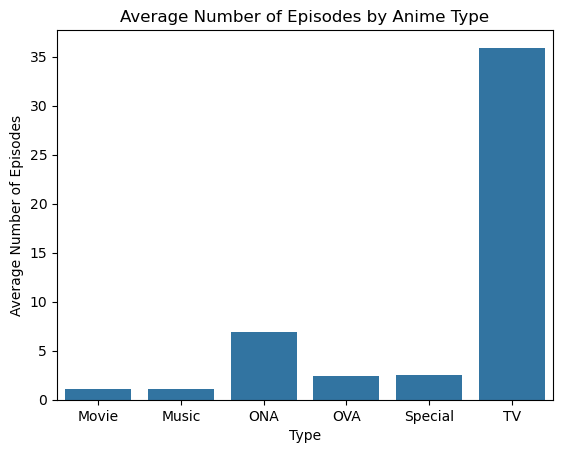

In [28]:
data['episodes'] = pd.to_numeric(data['episodes'], errors='coerce')

# Calculate the average number of episodes per anime type
average_episodes = data.groupby('type')['episodes'].mean().reset_index()

# Create a bar plot with the average number of episodes
sns.barplot(x='type', y='episodes', data=average_episodes)
plt.title('Average Number of Episodes by Anime Type')
plt.xlabel('Type')
plt.ylabel('Average Number of Episodes')
plt.show()

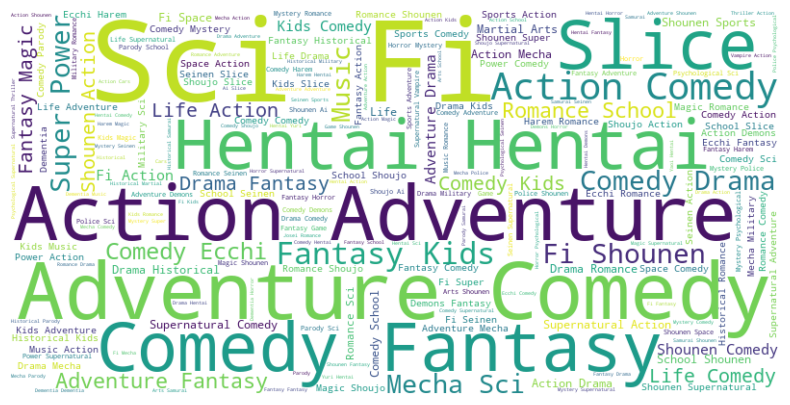

In [27]:
from wordcloud import WordCloud


data['genre'] = data['genre'].fillna('').astype(str)

# Combine all genres into a single string
text = ' '.join(data['genre'])

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated word cloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Model Training and Evaluation <a id="chapter7"><a>

<div class="alert alert-block alert-info">
  <b>Explanation:</b>  This step involves creating a mathemaical or computational model that categorize data into different classes or categories based on input features.
</div>

## Model Parameters and Hyperparameters tunning <a id="chapter8"><a>

<div class="alert alert-block alert-info">
<b>Explanation </b> Fine-tuning model parameters and hyperparameters is a crucial step in the machine learning workflow aimed at optimizing the performance of a model. Here are the primary purposes and benefits of fine-tuning:

* Improve Model Accuracy
* prevent Overfitting and Underfitting
* Enhance Model Efficiency
* Adapt to Specific Data Characteristics
* Improve Interpretability and Usability, and
* Maximize Utility of Hyperparameters.
</di>


## Conclusion <a id="chapter9"><a>

<div class="alert alert-block alert-info">
  <b>Conclusion:</b> The conclusion of a data analysis project ties together the findings and insights gained from the data. It reflects on the effectiveness of the preprocessing and cleaning steps, discusses the accuracy and reliability of the models used, and provides recommendations based on the results. A strong conclusion not only summarizes key points but also suggests future directions for research or improvements, emphasizing the overall impact and value of the analysis.
</div>
